Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah gambar dalam setiap kelas pada direktori training:
Hewan darat: 5
Hewan unggas: 5
Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/10
2/2 [==============================] - 2s 659ms/step - loss: 1.0804 - accuracy: 0.3750 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 1s 446ms/step - loss: 0.6770 - accuracy: 0.7500 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 1s 562ms/step - loss: 0.7025 - accuracy: 0.3750 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 1s 442ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6750 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 1s 391ms/step - loss: 0.6661 - accuracy: 0.5000 - val_loss: 0.6729 - val_accuracy: 1.0000
Epoc

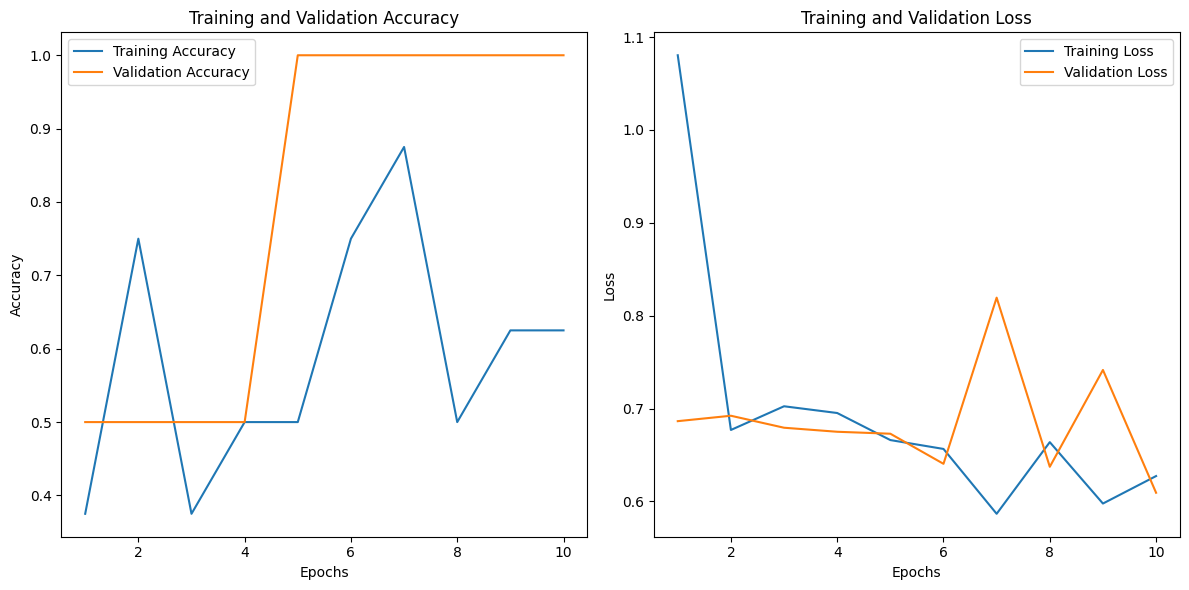

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Direktori data
base_dir = '/content/drive/My Drive/hewan/bahan'

# Subdirektori untuk data
hewandarat_dir = os.path.join(base_dir, 'hewandarat')
hewanunggas_dir = os.path.join(base_dir, 'hewanunggas')

# Menghitung jumlah gambar dalam setiap subdirektori
print("Jumlah gambar dalam setiap kelas pada direktori training:")
print('Hewan darat:', len(os.listdir(hewandarat_dir)))
print('Hewan unggas:', len(os.listdir(hewanunggas_dir)))

# Parameter
batch_size = 5
img_height = 150
img_width = 150
epochs = 10

# Data augmentation dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Set up train and validation generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 neuron untuk 2 kelas utama (hewan darat dan unggas)
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Dapatkan nilai akurasi pelatihan dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Atur nilai val_acc dari awal hingga akhir epoch
val_acc_smooth = [val_acc[0]]  # Memulai dengan nilai val_acc pertama

for i in range(1, epochs):
    val_acc_smooth.append(max(val_acc[i], val_acc_smooth[-1]))

# Plot training & validation accuracy and loss
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc_smooth, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 39ms/step


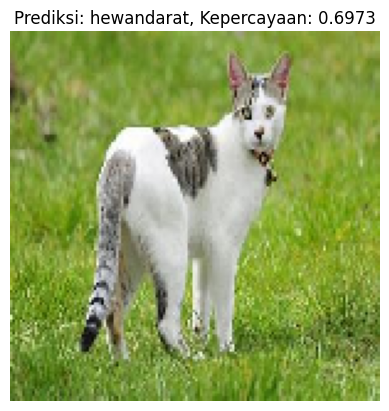

In [ ]:
# Fungsi untuk memprediksi gambar
def predict_image(model, img_path, target_size=(150, 150)):
    # Muat dan proses gambar
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.  # Normalisasi nilai piksel

    # Prediksi probabilitas kelas
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])  # Dapatkan indeks kelas dengan probabilitas tertinggi

    # Tentukan label kelas
    class_labels = ['hewandarat', 'hewanunggas']  # Sesuaikan dengan label kelas Anda

    # Tampilkan gambar dan kelas yang diprediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediksi: {class_labels[class_idx]}, Kepercayaan: {preds[0][class_idx]:.4f}')
    plt.show()

# Contoh penggunaan: Ganti 'img_path' dengan jalur file gambar Anda
img_path = '/content/drive/My Drive/hewan/bahan/hewandarat/kucing.jpg'  # Sesuaikan dengan jalur file gambar Anda
predict_image(model, img_path)
